In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler,Binarizer
data=pd.read_csv('diabetes.csv')

In [2]:
def get_clf_eval(y_test,pred,pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=np.round(accuracy_score(y_test,pred),4)
    precision=np.round(precision_score(y_test,pred),4)
    recall=np.round(recall_score(y_test,pred),4)
    f1=np.round(f1_score(y_test,pred),4)
    roc_auc=np.round(roc_auc_score(y_test,pred_proba),4)
    
    print('오차행렬:')
    print(confusion)
    
    
    print('정확도:{0}, 정밀도:{1}, 재현율:{2}, f1:{3},AUC:{4}'.format(accuracy, precision,recall,f1,roc_auc))

def precision_recall_curve_plot(y_test,pred_proba_c1):
    
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='-',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.show()
    
def get_clf_eval_by_thresholds(y_test,pred_proba,thresholds):
    for threshold in thresholds:
        binarizer=Binarizer(threshold).fit(pred_proba)
        predict=binarizer.transform(pred_proba)
        print('임곗값:',threshold)
        get_clf_eval(y_test,predict,pred_proba)
    

In [3]:

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_prob=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_prob)

오차행렬:
[[88 12]
 [23 31]]
정확도:0.7727, 정밀도:0.7209, 재현율:0.5741, f1:0.6392,AUC:0.7919


C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


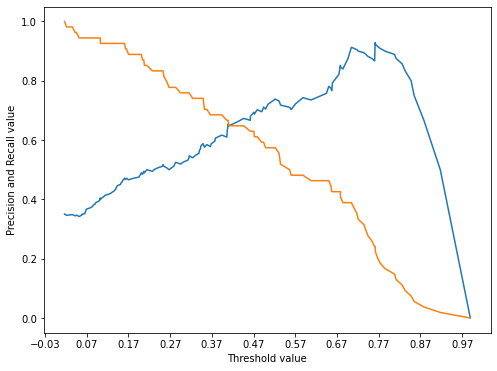

In [6]:
precision_recall_curve_plot(y_test,pred_prob)

임곗값을 0.42정도로 낮추면 정밀도와 재현율이 균형을 이루지만 두 지표 모두 0.7이 안되는 수치


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

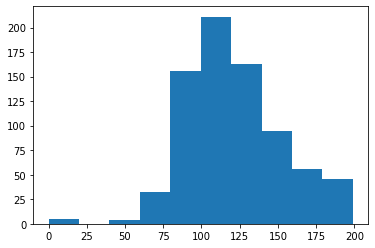

In [8]:
plt.hist(data['Glucose'],bins=10)

In [9]:
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

total_count=data['Glucose'].count()

for feature in zero_features:
    zero_count=data[data[feature]==0][feature].count()
    print('{0} 0건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature,zero_count,100*zero_count/total_count))

Glucose 0건수는 5, 퍼센트는 0.65%
BloodPressure 0건수는 35, 퍼센트는 4.56%
SkinThickness 0건수는 227, 퍼센트는 29.56%
Insulin 0건수는 374, 퍼센트는 48.70%
BMI 0건수는 11, 퍼센트는 1.43%


SkinThickness, Insulin 의 0값이 많음. 0값을 피처의 평균값으로 대체하기

In [10]:
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

In [11]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=156,stratify=y)

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)

오차행렬:
[[89 11]
 [21 33]]
정확도:0.7922, 정밀도:0.75, 재현율:0.6111, f1:0.6735,AUC:0.8083


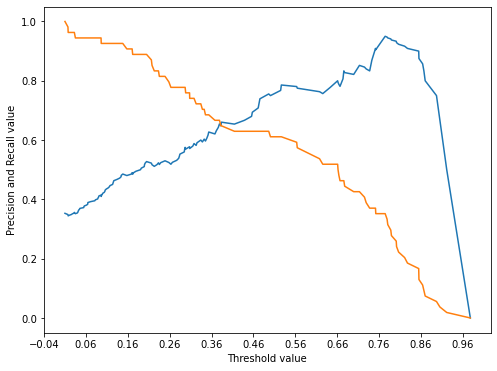

In [12]:
precision_recall_curve_plot(y_test,pred_proba)

In [14]:
thresholds=[0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
get_clf_eval_by_thresholds(y_test,pred_proba.reshape(-1,1),thresholds)

임곗값: 0.3
오차행렬:
[[70 30]
 [13 41]]
정확도:0.7208, 정밀도:0.5775, 재현율:0.7593, f1:0.656,AUC:0.8083
임곗값: 0.33
오차행렬:
[[74 26]
 [15 39]]
정확도:0.7338, 정밀도:0.6, 재현율:0.7222, f1:0.6555,AUC:0.8083
임곗값: 0.36
오차행렬:
[[78 22]
 [18 36]]
정확도:0.7403, 정밀도:0.6207, 재현율:0.6667, f1:0.6429,AUC:0.8083
임곗값: 0.39
오차행렬:
[[82 18]
 [20 34]]
정확도:0.7532, 정밀도:0.6538, 재현율:0.6296, f1:0.6415,AUC:0.8083
임곗값: 0.42
오차행렬:
[[83 17]
 [20 34]]
정확도:0.7597, 정밀도:0.6667, 재현율:0.6296, f1:0.6476,AUC:0.8083
임곗값: 0.45
오차행렬:
[[84 16]
 [20 34]]
정확도:0.7662, 정밀도:0.68, 재현율:0.6296, f1:0.6538,AUC:0.8083
임곗값: 0.48
오차행렬:
[[89 11]
 [20 34]]
정확도:0.7987, 정밀도:0.7556, 재현율:0.6296, f1:0.6869,AUC:0.8083
임곗값: 0.5
오차행렬:
[[89 11]
 [21 33]]
정확도:0.7922, 정밀도:0.75, 재현율:0.6111, f1:0.6735,AUC:0.8083


C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.33 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.36 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.39 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\sklearn\util

임곗값 0.48이 적당함을 알 수 있음 (f1스코어가 가장 높다)

In [29]:
binarizer=Binarizer(threshold=0.48)
new_pred=binarizer.fit_transform(pred_proba.reshape(-1,1))
get_clf_eval(y_test,new_pred,pred_proba.reshape(-1,1))

오차행렬:
[[89 11]
 [20 34]]
정확도:0.7987, 정밀도:0.7556, 재현율:0.6296, f1:0.6869,AUC:0.8083
